In [1]:
import sys
import os
sys.path.append('/home/yutanagano/Projects/tcr_embedder')
os.chdir('/home/yutanagano/Projects/tcr_embedder')

In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn

seaborn.set_theme()
seaborn.set_style('white')

In [3]:
BENCHMARKING_PARENT_DIR = Path('benchmarks')

In [4]:
metric_dicts = []

for model in BENCHMARKING_PARENT_DIR.iterdir():
    with open(model/'metrics.json', 'r') as f:
        metric_dicts.append(json.load(f))

In [5]:
metrics = pd.DataFrame(metric_dicts)
metrics['model_name'] = metrics['model_name'].map(lambda x: 'random_embedder' if 'random_embedder' in x else x)
metrics = metrics.sort_values(by='model_name', ignore_index=True)

In [6]:
metrics

,model_name,alignment,uniformity,5nn_accuracy
0,atchley_embedder,0.880457,-1.691871,0.704057
1,random_embedder,0.717799,-1.599363,0.739857
2,random_embedder,0.855507,-2.048513,0.773270
3,random_embedder,0.371018,-1.016268,0.749403
4,random_embedder,0.440349,-1.079644,0.756563
5,random_embedder,0.530427,-1.209096,0.727924
6,random_embedder,0.550404,-1.302152,0.778043
7,random_embedder,0.419517,-0.908548,0.720764
8,random_embedder,0.617104,-1.421826,0.735084
9,random_embedder,0.846791,-1.746956,0.720764


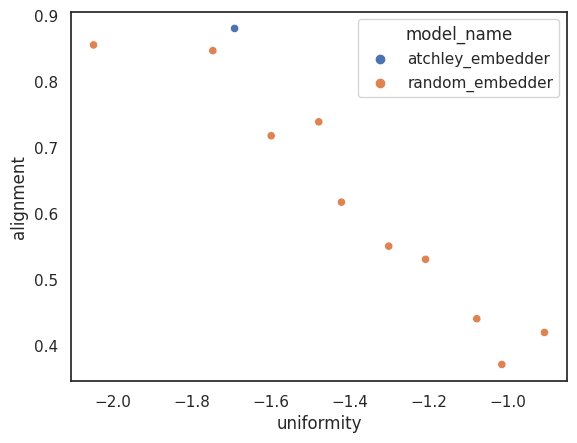

In [9]:
scatter_model_names = seaborn.scatterplot(metrics, x='uniformity', y='alignment', hue='model_name')
plt.show()

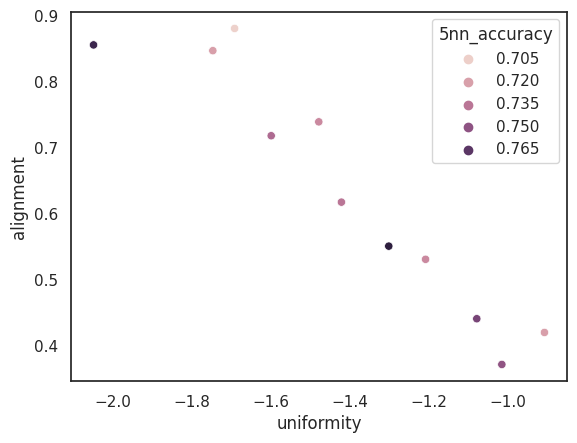

In [10]:
scatter_5nn_accs = seaborn.scatterplot(metrics, x='uniformity', y='alignment', hue='5nn_accuracy')
plt.show()